In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [36]:
df = pd.read_csv('tmdb_box_merge_new.csv')

In [37]:
df.head(20)

,title,production_budget,domestic_gross_x,worldwide_gross,studio,genre_ids,original_language,popularity,vote_average,vote_count,date,Year,Month
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,BV,"[12, 28, 14]",en,30.579,6.4,8571.0,2011-05-20,2011.0,5.0
1,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,6.0
2,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,BV,"[28, 12, 878]",en,44.383,7.3,13457.0,2015-05-01,2015.0,5.0
3,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,12.0
4,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.0,12.0
5,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,BV,"[12, 28, 14]",en,80.773,8.3,13948.0,2018-04-27,2018.0,4.0
6,Justice League,300000000.0,229024295.0,6.559452e+08,WB,"[28, 12, 14, 878]",en,34.953,6.2,7510.0,2017-11-17,2017.0,11.0
7,Spectre,300000000.0,200074175.0,8.796209e+08,Sony,"[28, 12, 80]",en,30.318,6.4,6719.0,2015-11-06,2015.0,11.0
8,The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,WB,"[28, 80, 18, 53]",en,26.220,7.7,13933.0,2012-07-20,2012.0,7.0
9,Solo: A Star Wars Story,275000000.0,213767512.0,3.931513e+08,BV,"[28, 12, 878]",en,29.502,6.6,3838.0,2018-05-25,2018.0,5.0


In [38]:
df.columns

Index(['title', 'production_budget', 'domestic_gross_x', 'worldwide_gross',
       'studio', 'genre_ids', 'original_language', 'popularity',
       'vote_average', 'vote_count', 'date', 'Year', 'Month'],
      dtype='object')

In [44]:
df['genre_ids'].isna().sum()

1505

In [41]:
df.popularity.isna().sum()

1505

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26006 entries, 0 to 26005
Data columns (total 16 columns):
Unnamed: 0           26006 non-null int64
title                26006 non-null object
production_budget    2167 non-null float64
domestic_gross_x     2167 non-null float64
worldwide_gross      2167 non-null float64
month                2167 non-null float64
year                 4320 non-null float64
studio               3360 non-null object
genre_ids            24501 non-null object
original_language    24501 non-null object
popularity           24501 non-null float64
vote_average         24501 non-null float64
vote_count           24501 non-null float64
date                 24501 non-null object
month.1              24501 non-null float64
year.1               24501 non-null float64
dtypes: float64(10), int64(1), object(5)
memory usage: 3.2+ MB


## Dropped extra YEAR and MONTH columns and replaced with Merged version

In [22]:
##  Need to merge Year and Month columns to fill in NaN values

df['Year'] = df['year.1'].fillna(df.year)
df['Month'] = df['month.1'].fillna(df.month)
df.drop(columns = ['Unnamed: 0', 'month', 'year', 'month.1', 'year.1'], inplace = True)

In [23]:
df.head()

,title,production_budget,domestic_gross_x,worldwide_gross,studio,genre_ids,original_language,popularity,vote_average,vote_count,date,Year,Month
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,BV,"[12, 28, 14]",en,30.579,6.4,8571.0,2011-05-20,2011.0,5.0
1,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0,6.0
2,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,BV,"[28, 12, 878]",en,44.383,7.3,13457.0,2015-05-01,2015.0,5.0
3,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,12.0
4,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.0,12.0


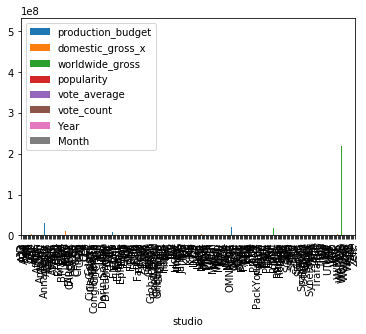

In [32]:
df.groupby(by = df.studio).mean().plot.bar()

In [35]:

#df.plot(x = df.worldwide_gross, y = df.popularity, kind = 'scatter')

mask = ~df[['worldwide_gross','popularity']].isnull().any()
plt.scatter(x= df.loc[mask, 'worldwide_gross'] , y = df.loc[mask, 'popularity'] )


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


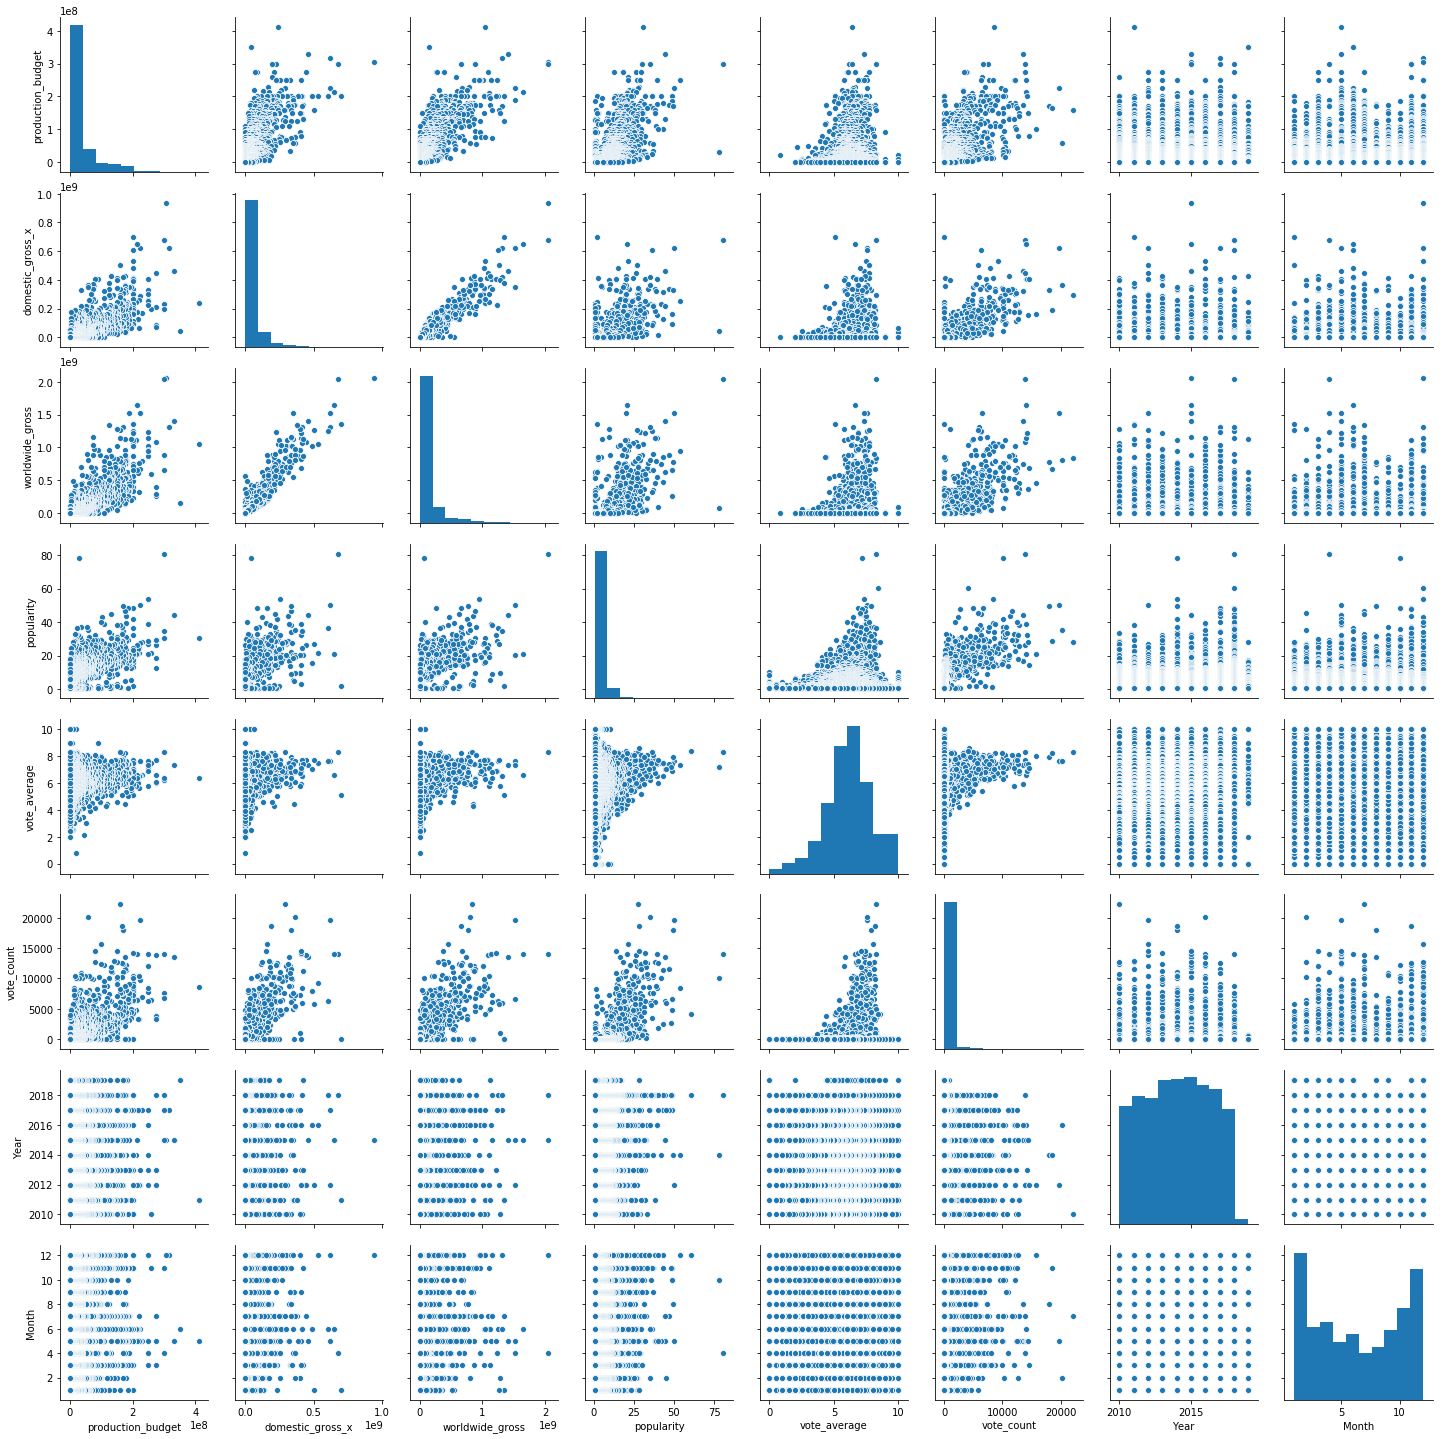

In [46]:
sns.pairplot(data=df)

In [64]:
corr = df[['production_budget', 'worldwide_gross', 'vote_count', 'popularity']].corr()
corr.style.background_gradient(cmap='YlGn')

,production_budget,worldwide_gross,vote_count,popularity
production_budget,1,0.796497,0.640681,0.607493
worldwide_gross,0.796497,1,0.743855,0.605764
vote_count,0.640681,0.743855,1,0.679038
popularity,0.607493,0.605764,0.679038,1


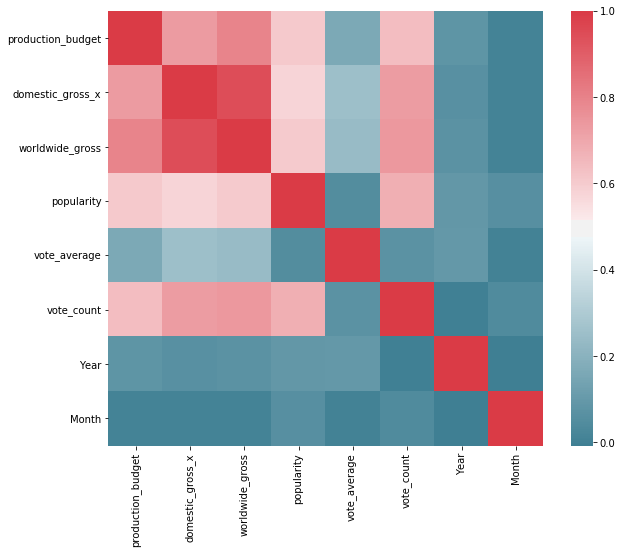

In [49]:
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

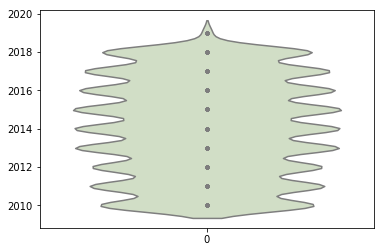

In [57]:
# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(8, rot=-.5, dark=.3)

# Show each distribution with both violins and points
sns.violinplot(data=df['Year'], palette=pal, inner="points")

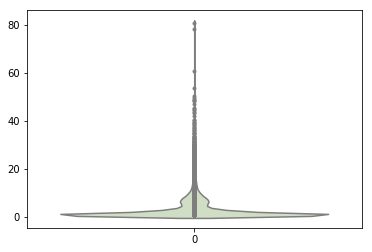

In [58]:
sns.violinplot(data=df['popularity'], palette=pal, inner="points")

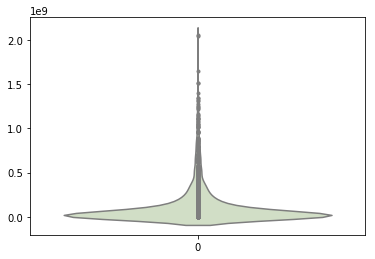

In [59]:
sns.violinplot(data=df['worldwide_gross'], palette=pal, inner="points")